# Global Power Plant Database

Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Global_Power.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#most of the data is in oobject types. We have to convert this into integer/Float for further analysis
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [4]:
#Lets check the unique values
print("Distinct values of each column")
for column in df:
    print(f'- {column}: {df[column].unique()}')

Distinct values of each column
- country: ['IND']
- country_long: ['India']
- name: ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'B. BRIDGE D.G' 'BADARPUR'
 'BAGALKOT ICP' 'BA

In [5]:
#Let's drop unnecessary columns
df.drop("country_long",axis=1,inplace=True)

In [6]:
df.drop("wepp_id",axis=1,inplace=True)

In [7]:
df.drop("country",axis=1,inplace=True)

In [8]:
df.drop("other_fuel3",axis=1,inplace=True)

In [9]:
df.drop("url",axis=1,inplace=True)

In [10]:
df.drop("generation_data_source",axis=1,inplace=True)
df.drop("estimated_generation_gwh",axis=1,inplace=True)
df.drop("other_fuel2",axis=1,inplace=True)
df.drop("year_of_capacity_data",axis=1,inplace=True)
df.drop("gppd_idnr",axis=1,inplace=True)

In [11]:
df.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
owner                   object
source                  object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

We can see that most of the columns are in object. 

In [12]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,631.777928,617.789264,843.747,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [13]:
#lets convert the object data into integer/Float for further analysis
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["latitude"]=imp.fit_transform(df["latitude"].values.reshape(-1,1))

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["longitude"]=imp.fit_transform(df["longitude"].values.reshape(-1,1))

In [15]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["other_fuel1"]=imp.fit_transform(df["other_fuel1"].values.reshape(-1,1))

In [16]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["commissioning_year"]=imp.fit_transform(df["commissioning_year"].values.reshape(-1,1))

In [17]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["owner"]=imp.fit_transform(df["owner"].values.reshape(-1,1))

In [18]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["geolocation_source"]=imp.fit_transform(df["geolocation_source"].values.reshape(-1,1))

In [19]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["generation_gwh_2013"]=imp.fit_transform(df["generation_gwh_2013"].values.reshape(-1,1))

In [20]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["generation_gwh_2014"]=imp.fit_transform(df["generation_gwh_2014"].values.reshape(-1,1))

In [21]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["generation_gwh_2016"]=imp.fit_transform(df["generation_gwh_2016"].values.reshape(-1,1))

In [22]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["generation_gwh_2015"]=imp.fit_transform(df["generation_gwh_2015"].values.reshape(-1,1))

In [23]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["generation_gwh_2017"]=imp.fit_transform(df["generation_gwh_2017"].values.reshape(-1,1))

In [24]:
df.isnull().sum() #No Null value

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [25]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.084948,77.156237,2003.624449,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.107146,4.945215,15.238021,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,1997.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.492900,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2013.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


We can see thatthat there are differnce present in the mean the meadian in the cacacity_mw so the right side skewness is present. also we can see that there is a huge difference between 75% and the maximumv value in every column so we can say that the outliers are present.   

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

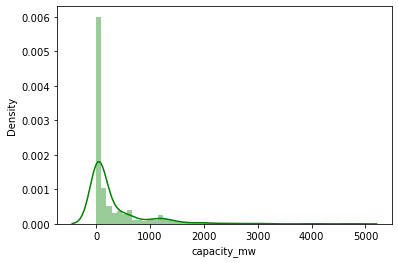

In [26]:
sns.distplot(x=df['capacity_mw'], axlabel='capacity_mw', color='Green')

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

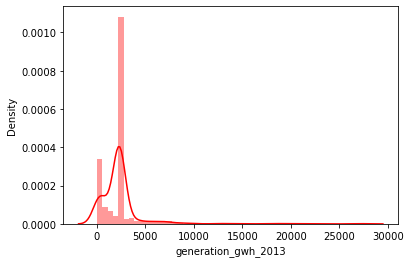

In [27]:
sns.distplot(x=df['generation_gwh_2013'], axlabel='generation_gwh_2013', color='Red')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

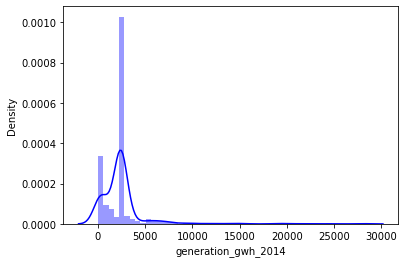

In [28]:
sns.distplot(x=df['generation_gwh_2014'], axlabel='generation_gwh_2014', color='Blue')

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

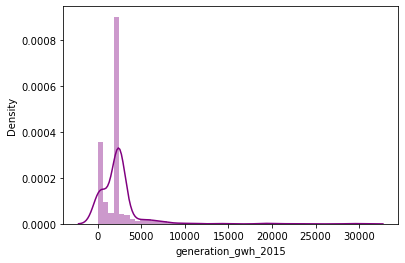

In [29]:
sns.distplot(x=df['generation_gwh_2015'], axlabel='generation_gwh_2015', color='Purple')

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

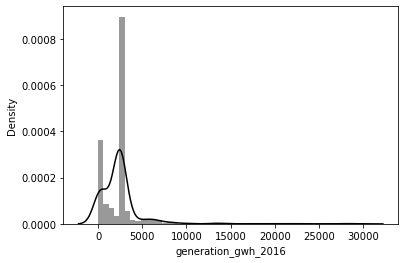

In [30]:
sns.distplot(x=df['generation_gwh_2016'], axlabel='generation_gwh_2016', color="Black")

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

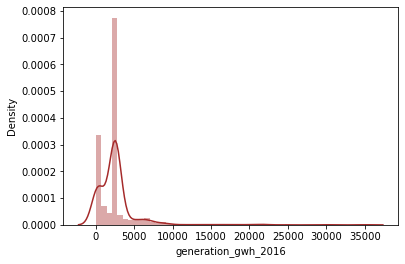

In [31]:
sns.distplot(x=df['generation_gwh_2017'], axlabel='generation_gwh_2016', color="Brown")

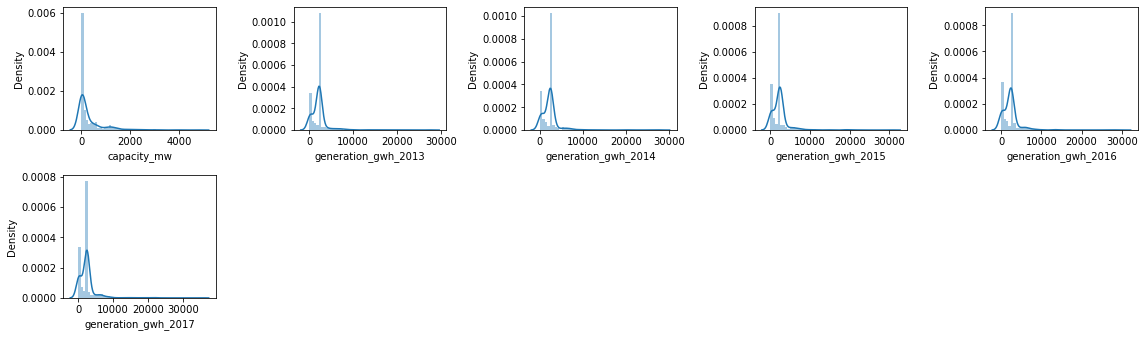

In [32]:
collist=("capacity_mw","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017")
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

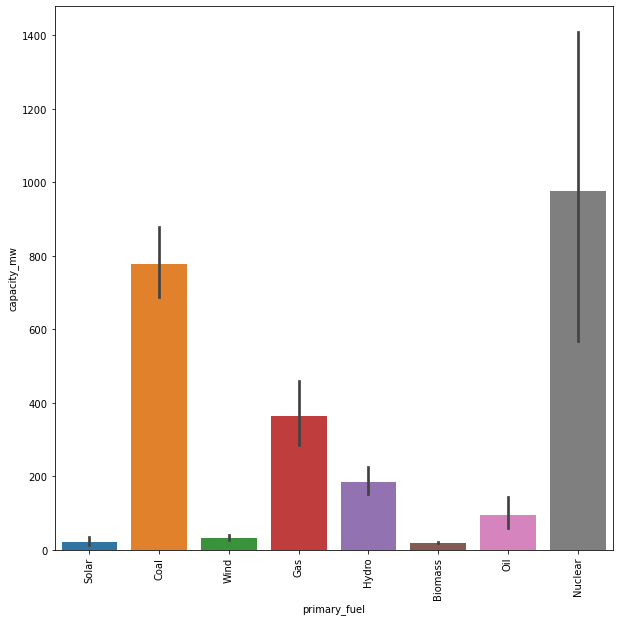

In [33]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = df['primary_fuel'], y = df['capacity_mw'])
plt.xticks(rotation = 90);

In [ ]:
#Major capicity is come form the fuel type "Nuclear" followed by fuel

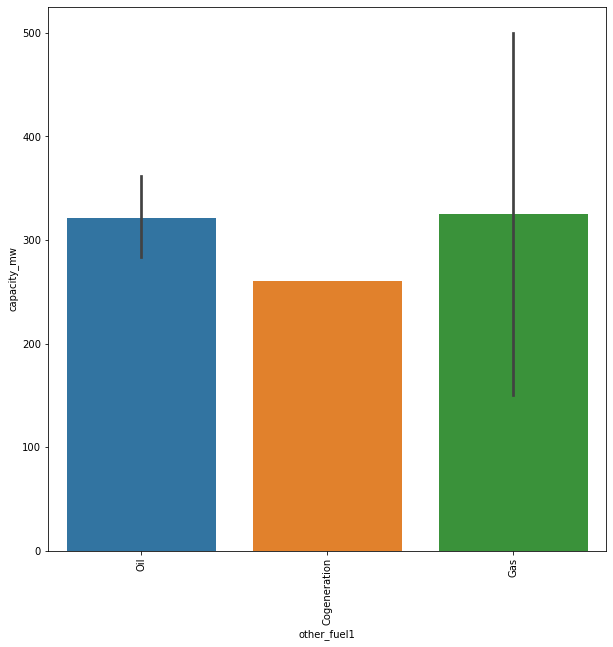

In [34]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = df['other_fuel1'], y = df['capacity_mw'])
plt.xticks(rotation = 90);

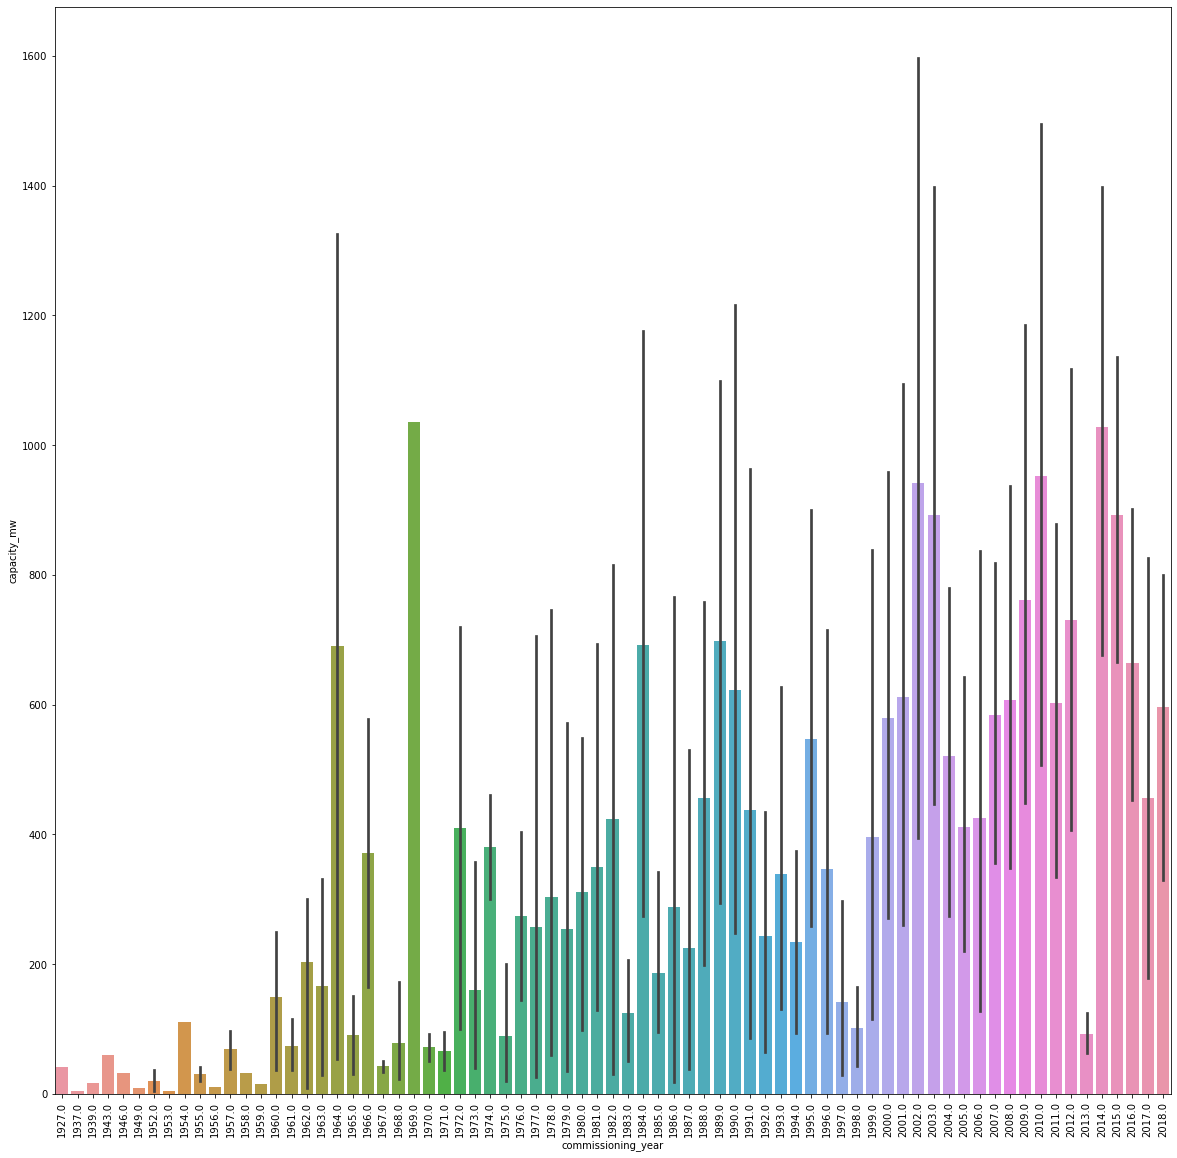

In [35]:
f, ax = plt.subplots(figsize=(20, 20))
sns.barplot(x = df['commissioning_year'], y = df['capacity_mw'])
plt.xticks(rotation = 90);

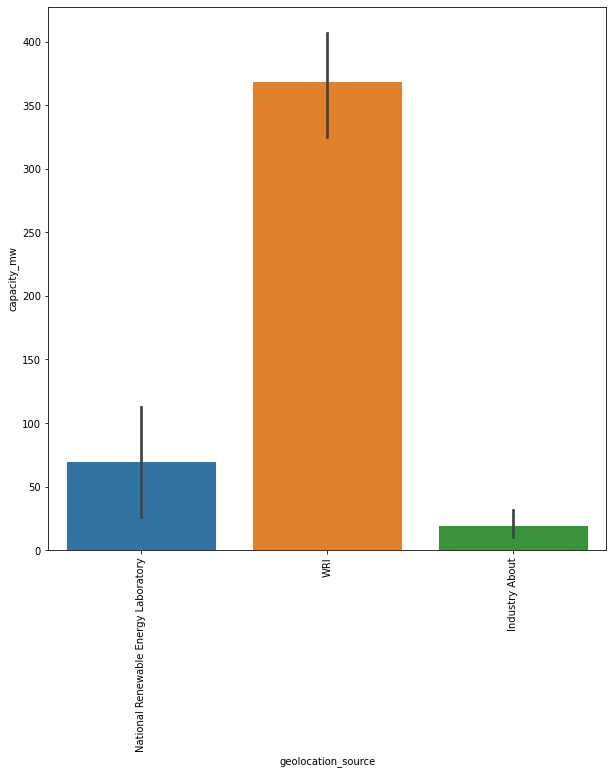

In [36]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['geolocation_source'], y = df['capacity_mw'])
plt.xticks(rotation = 90);

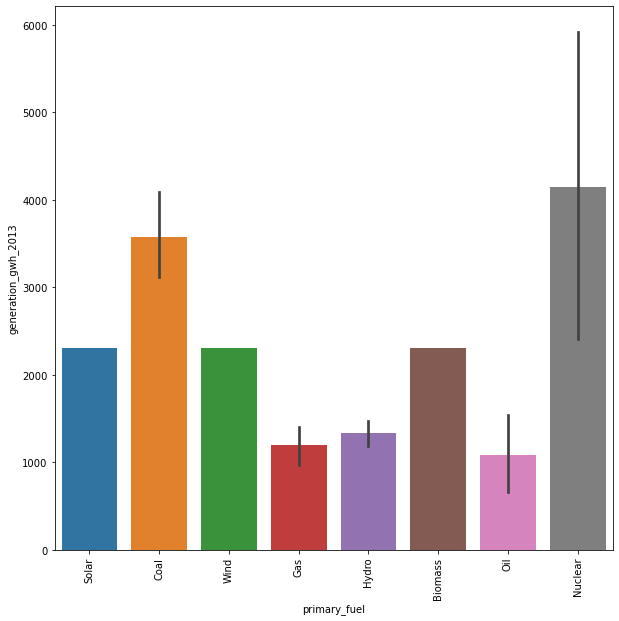

In [37]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['primary_fuel'], y = df['generation_gwh_2013'])
plt.xticks(rotation = 90);

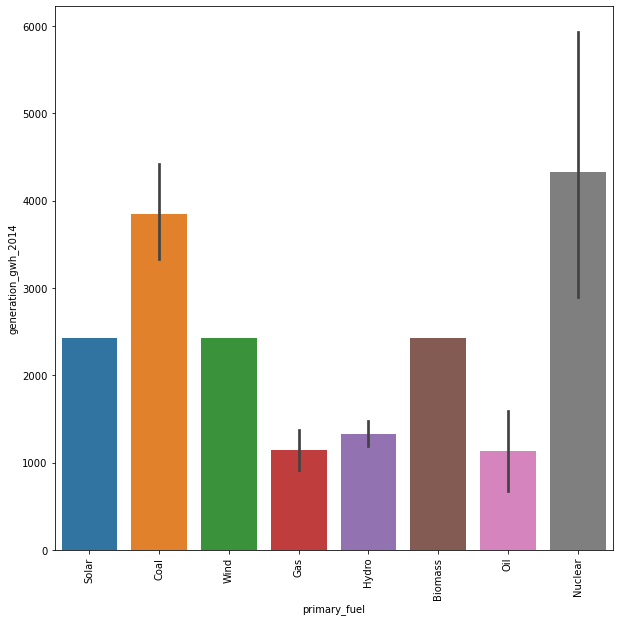

In [38]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['primary_fuel'], y = df['generation_gwh_2014'])
plt.xticks(rotation = 90);

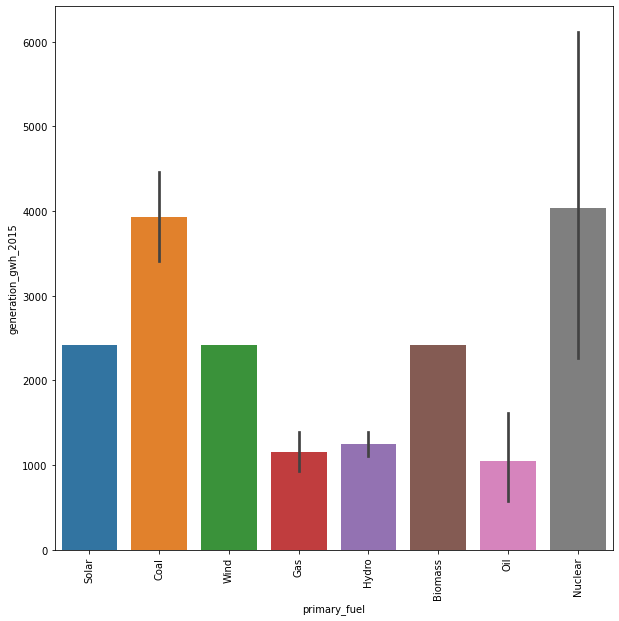

In [39]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['primary_fuel'], y = df['generation_gwh_2015'])
plt.xticks(rotation = 90);

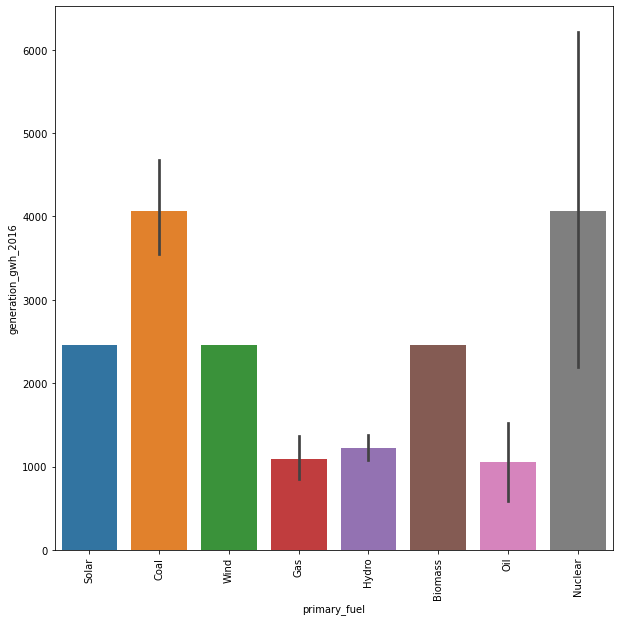

In [40]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['primary_fuel'], y = df['generation_gwh_2016'])
plt.xticks(rotation = 90);

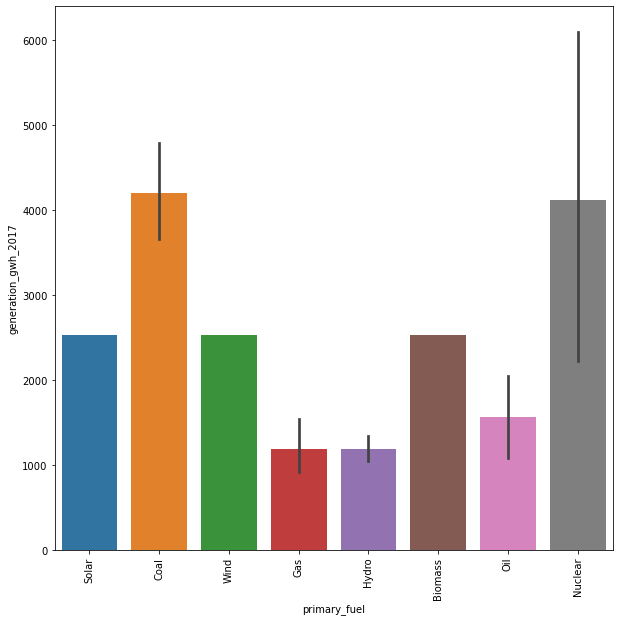

In [41]:
f, ax = plt.subplots(figsize=(10,10))
sns.barplot(x = df['primary_fuel'], y = df['generation_gwh_2017'])
plt.xticks(rotation = 90);

In [42]:
df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,Oil,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,Oil,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,Oil,2013.0,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,Oil,2004.0,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [43]:
df.shape

(908, 15)

In [44]:
#Lets Check the skewness and remove them
df.skew()

capacity_mw            3.193257
latitude              -0.093609
longitude              1.118449
commissioning_year    -1.779021
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [45]:
import numpy as np
skew=("capacity_mw","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [46]:
df.skew()

capacity_mw            0.125029
latitude              -0.093609
longitude              1.118449
commissioning_year    -1.779021
generation_gwh_2013   -2.699707
generation_gwh_2014   -2.589757
generation_gwh_2015   -2.311574
generation_gwh_2016   -2.269502
generation_gwh_2017   -2.278767
dtype: float64

In [47]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["name"]=le.fit_transform(df["name"].astype(str))
df["primary_fuel"]=le.fit_transform(df["primary_fuel"].astype(str))
df["other_fuel1"]=le.fit_transform(df["other_fuel1"].astype(str))
df["owner"]=le.fit_transform(df["owner"].astype(str))
df["source"]=le.fit_transform(df["source"].astype(str))
df["geolocation_source"]=le.fit_transform(df["geolocation_source"].astype(str))

In [48]:
df.dtypes

name                     int32
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel             int32
other_fuel1              int32
commissioning_year     float64
owner                    int32
source                   int32
geolocation_source       int32
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

In [49]:
df.describe()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,4.296770,21.084948,77.156237,3.205947,1.995595,2003.624449,56.113436,43.823789,1.733480,7.167100,7.141632,7.059441,7.057566,7.071414
std,262.26132,1.863873,6.107146,4.945215,2.281339,0.081214,15.238021,82.501086,44.624092,0.676835,1.598204,1.747424,1.830402,1.852829,1.900357
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,2.881243,17.057825,73.812975,1.000000,2.000000,1997.000000,5.000000,22.000000,2.000000,7.195559,7.070046,6.774455,6.718563,6.749191
50%,453.50000,4.110874,21.278850,76.492900,3.000000,2.000000,2013.000000,5.000000,22.000000,2.000000,7.742862,7.792098,7.789485,7.805856,7.837063
75%,680.25000,5.963900,25.183775,79.211600,6.000000,2.000000,2013.000000,95.250000,29.250000,2.000000,7.742862,7.792098,7.789485,7.805856,7.837063
max,907.00000,8.468213,34.649000,95.408000,7.000000,2.000000,2018.000000,279.000000,190.000000,2.000000,10.225107,10.244521,10.326793,10.309486,10.466441


In [50]:
df.corr()

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
name,1.000000,0.014372,-0.135744,0.010089,0.038752,-0.074643,-0.040006,0.098944,-0.013801,0.035528,0.054102,0.041223,0.025824,0.024088,0.041600
capacity_mw,0.014372,1.000000,0.073623,0.330848,-0.533576,-0.037699,-0.108333,-0.490612,-0.392566,0.459304,-0.048017,-0.054577,-0.055518,-0.038057,-0.051759
latitude,-0.135744,0.073623,1.000000,0.050511,-0.023407,0.035502,0.035378,-0.069336,0.061728,-0.190605,0.025805,0.070346,0.066878,0.102135,0.070997
longitude,0.010089,0.330848,0.050511,1.000000,-0.369505,0.026090,-0.138390,-0.286716,-0.211786,0.220798,-0.082557,-0.100233,-0.116868,-0.070733,-0.087884
primary_fuel,0.038752,-0.533576,-0.023407,-0.369505,1.000000,0.004902,0.145487,0.284055,0.053609,-0.482803,0.064318,0.078350,0.077121,0.057979,0.081160
other_fuel1,-0.074643,-0.037699,0.035502,0.026090,0.004902,1.000000,0.054789,0.033643,0.026557,-0.021383,0.062157,0.051608,0.075898,0.098803,0.041108
commissioning_year,-0.040006,-0.108333,0.035378,-0.138390,0.145487,0.054789,1.000000,0.381615,0.301660,-0.242439,0.203601,0.209216,0.234548,0.275835,0.226557
owner,0.098944,-0.490612,-0.069336,-0.286716,0.284055,0.033643,0.381615,1.000000,0.769652,-0.384993,0.223442,0.230877,0.247375,0.250489,0.249890
source,-0.013801,-0.392566,0.061728,-0.211786,0.053609,0.026557,0.301660,0.769652,1.000000,-0.505823,0.176380,0.182249,0.195273,0.197731,0.197258
geolocation_source,0.035528,0.459304,-0.190605,0.220798,-0.482803,-0.021383,-0.242439,-0.384993,-0.505823,1.000000,-0.142015,-0.146741,-0.157227,-0.159206,-0.158825


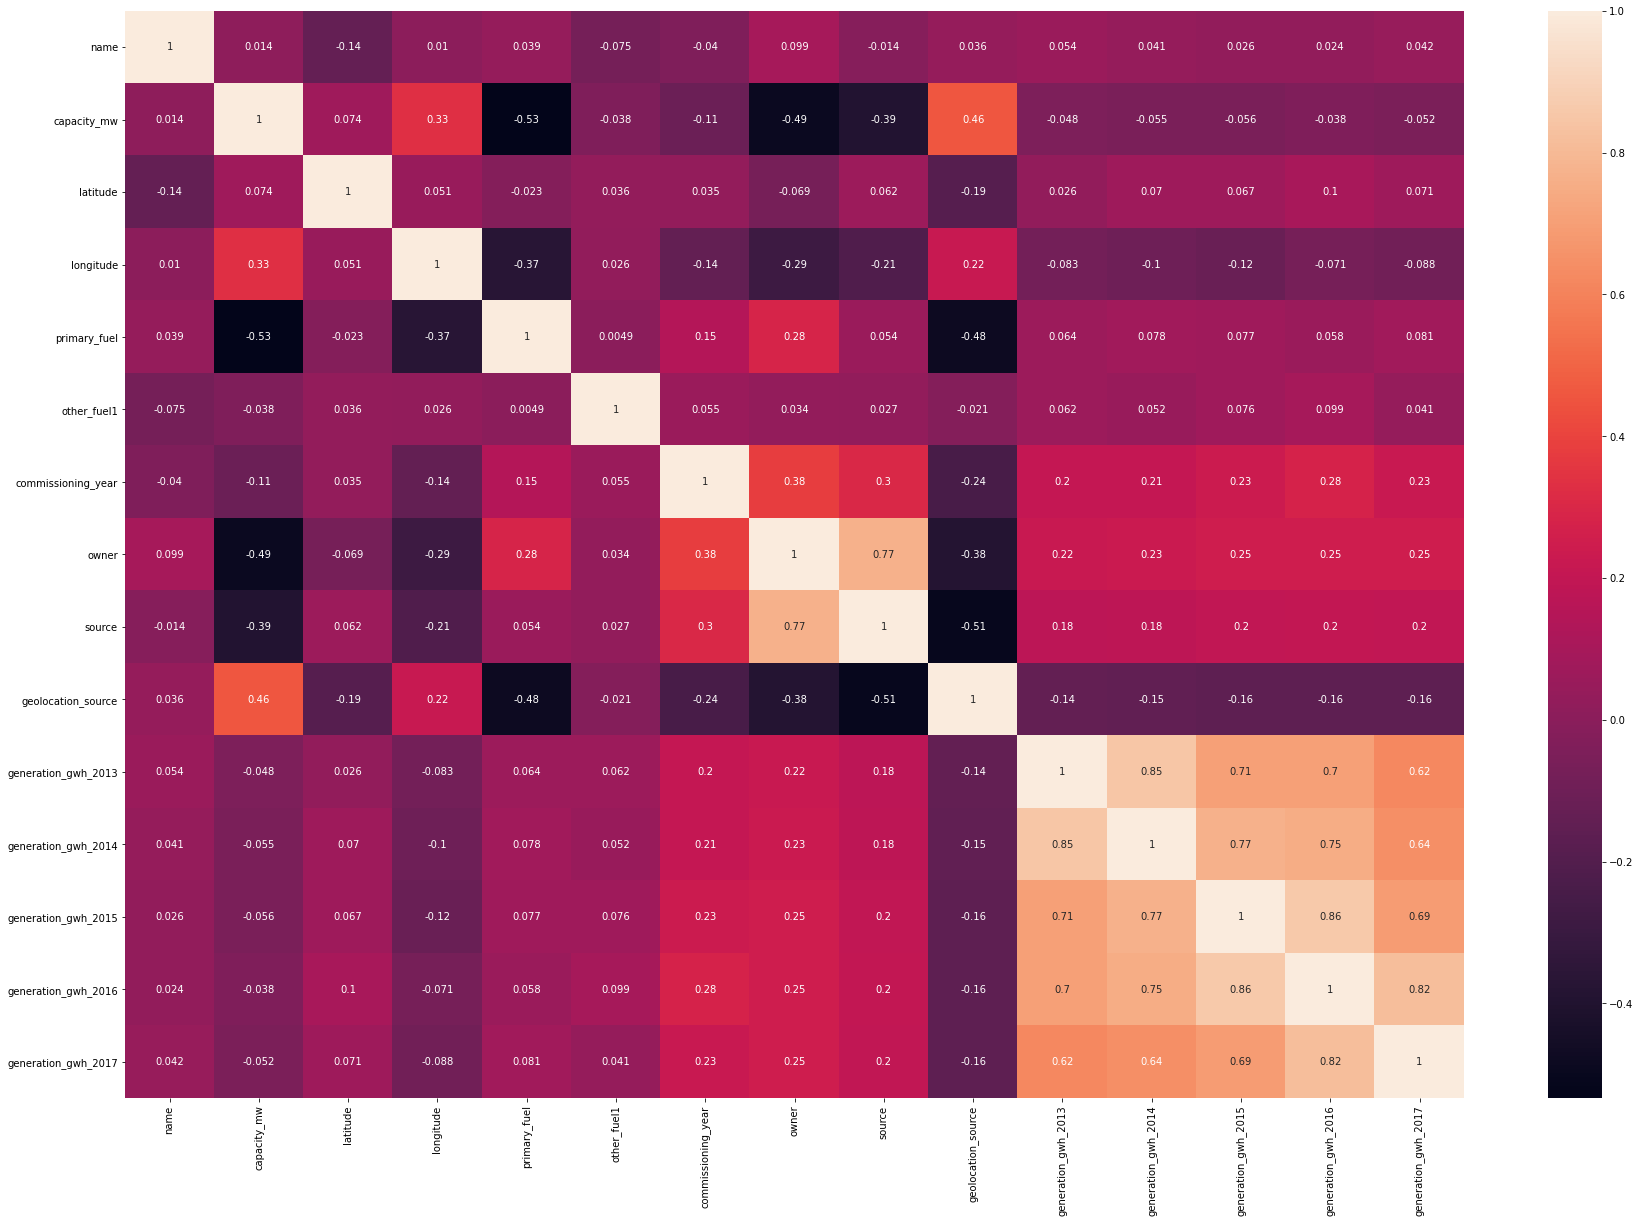

In [51]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,1.252763,28.1839,73.2407,6,2,2011.0,229,109,1,7.742862,7.792098,7.789485,7.805856,7.837063
1,1,4.595120,24.7663,74.6090,1,2,2013.0,258,174,2,7.742862,7.792098,7.789485,7.805856,7.837063
2,2,3.693867,21.9038,69.3732,7,2,2013.0,2,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
3,3,4.912655,23.8712,91.3602,2,2,2004.0,5,22,2,6.450120,6.427765,6.739037,6.787850,6.499448
4,4,7.496097,21.9603,82.4091,1,2,2015.0,5,22,2,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,7.378384,16.2949,77.3568,1,2,2016.0,5,22,2,7.742862,7.792098,0.690581,5.457868,6.764347
904,904,1.386294,12.8932,78.1654,6,2,2013.0,114,77,0,7.742862,7.792098,7.789485,7.805856,7.837063
905,905,3.277145,15.2758,75.5811,7,2,2013.0,5,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
906,906,4.394449,24.3500,73.7477,1,2,2013.0,91,59,2,7.742862,7.792098,7.789485,7.805856,7.837063


In [53]:
df2=df.drop("capacity_mw",axis=1)

In [54]:
df2

,name,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2,2011.0,229,109,1,7.742862,7.792098,7.789485,7.805856,7.837063
1,1,24.7663,74.6090,1,2,2013.0,258,174,2,7.742862,7.792098,7.789485,7.805856,7.837063
2,2,21.9038,69.3732,7,2,2013.0,2,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
3,3,23.8712,91.3602,2,2,2004.0,5,22,2,6.450120,6.427765,6.739037,6.787850,6.499448
4,4,21.9603,82.4091,1,2,2015.0,5,22,2,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,16.2949,77.3568,1,2,2016.0,5,22,2,7.742862,7.792098,0.690581,5.457868,6.764347
904,904,12.8932,78.1654,6,2,2013.0,114,77,0,7.742862,7.792098,7.789485,7.805856,7.837063
905,905,15.2758,75.5811,7,2,2013.0,5,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
906,906,24.3500,73.7477,1,2,2013.0,91,59,2,7.742862,7.792098,7.789485,7.805856,7.837063


In [55]:
y=df.iloc[:,1]

In [56]:
y

0      1.252763
1      4.595120
2      3.693867
3      4.912655
4      7.496097
         ...   
903    7.378384
904    1.386294
905    3.277145
906    4.394449
907    2.862201
Name: capacity_mw, Length: 908, dtype: float64

In [57]:
x=df2

In [58]:
x

,name,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,28.1839,73.2407,6,2,2011.0,229,109,1,7.742862,7.792098,7.789485,7.805856,7.837063
1,1,24.7663,74.6090,1,2,2013.0,258,174,2,7.742862,7.792098,7.789485,7.805856,7.837063
2,2,21.9038,69.3732,7,2,2013.0,2,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
3,3,23.8712,91.3602,2,2,2004.0,5,22,2,6.450120,6.427765,6.739037,6.787850,6.499448
4,4,21.9603,82.4091,1,2,2015.0,5,22,2,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,16.2949,77.3568,1,2,2016.0,5,22,2,7.742862,7.792098,0.690581,5.457868,6.764347
904,904,12.8932,78.1654,6,2,2013.0,114,77,0,7.742862,7.792098,7.789485,7.805856,7.837063
905,905,15.2758,75.5811,7,2,2013.0,5,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
906,906,24.3500,73.7477,1,2,2013.0,91,59,2,7.742862,7.792098,7.789485,7.805856,7.837063


In [59]:
x.shape

(908, 14)

In [60]:
y.shape

(908,)

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [62]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((608, 14), (300, 14), (608,), (300,))

In [63]:
lm=LinearRegression()

In [64]:
lm.fit(x_train,y_train)

LinearRegression()

In [65]:
lm.coef_

array([ 0.00071535,  0.02996051,  0.0276866 , -0.30915704, -0.32569132,
        0.01639357, -0.00610741, -0.00684881,  0.41798584,  0.03603155,
       -0.01534187,  0.02658362,  0.01490015,  0.02404781])

In [66]:
lm.intercept_

-30.68441737927686

In [67]:
lm.score(x_train,y_train)

0.48600689467068725

In [68]:
pred=lm.predict(x_test)
print("predict result price",pred)
print("actual price",y_test)

predict result price [4.83615813 2.42499573 4.84730834 4.65041011 4.81808557 3.89833956
 3.83834528 3.71842617 5.75694337 5.65811857 4.87950478 5.32217323
 4.35218891 4.86864362 3.0954277  2.72653734 2.51917009 4.75360225
 6.1841705  5.19680691 5.47850817 4.82290627 1.46348788 5.26757051
 3.81396921 3.47589956 3.77663812 1.58217474 6.32545712 3.39243406
 3.31385384 5.94743517 4.858126   4.53959089 2.89374106 4.58427404
 5.1753137  5.46794596 5.23764627 3.34465073 5.20481552 5.48064666
 5.57310148 4.21898823 2.61308101 4.97239044 4.24729175 4.70007984
 4.84846547 2.8426705  2.56114171 6.15657577 2.95256623 5.04279246
 3.00510661 2.88242745 5.15668637 5.46197131 5.63590614 3.0162854
 3.69309661 4.53137145 3.88946257 5.42728467 1.09531429 5.43325599
 4.66541948 3.73040516 2.55222026 4.7860378  4.79992068 5.11180242
 4.69972836 3.86469237 4.80478438 6.06184396 5.29177711 5.88740668
 3.99120279 5.25481261 5.21963099 3.07404351 4.65783001 4.92746422
 5.00382604 4.88852998 4.61272816 4.544482

In [69]:
print("error:")

print("mean absolute error:",mean_absolute_error(y_test,pred))
print("men squared error:",mean_squared_error(y_test,pred))
print("root mean squared error:", np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 1.1097303483519454
men squared error: 1.8852588846258718
root mean squared error: 1.37304729875772


In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.4088487195778786


0.48600651679997964
[ 0.00071569  0.02994275  0.02767218 -0.30922252 -0.31305829  0.01638943
 -0.00610721 -0.00685226  0.4175614   0.03577702 -0.01508066  0.02651913
  0.01477893  0.02413777]


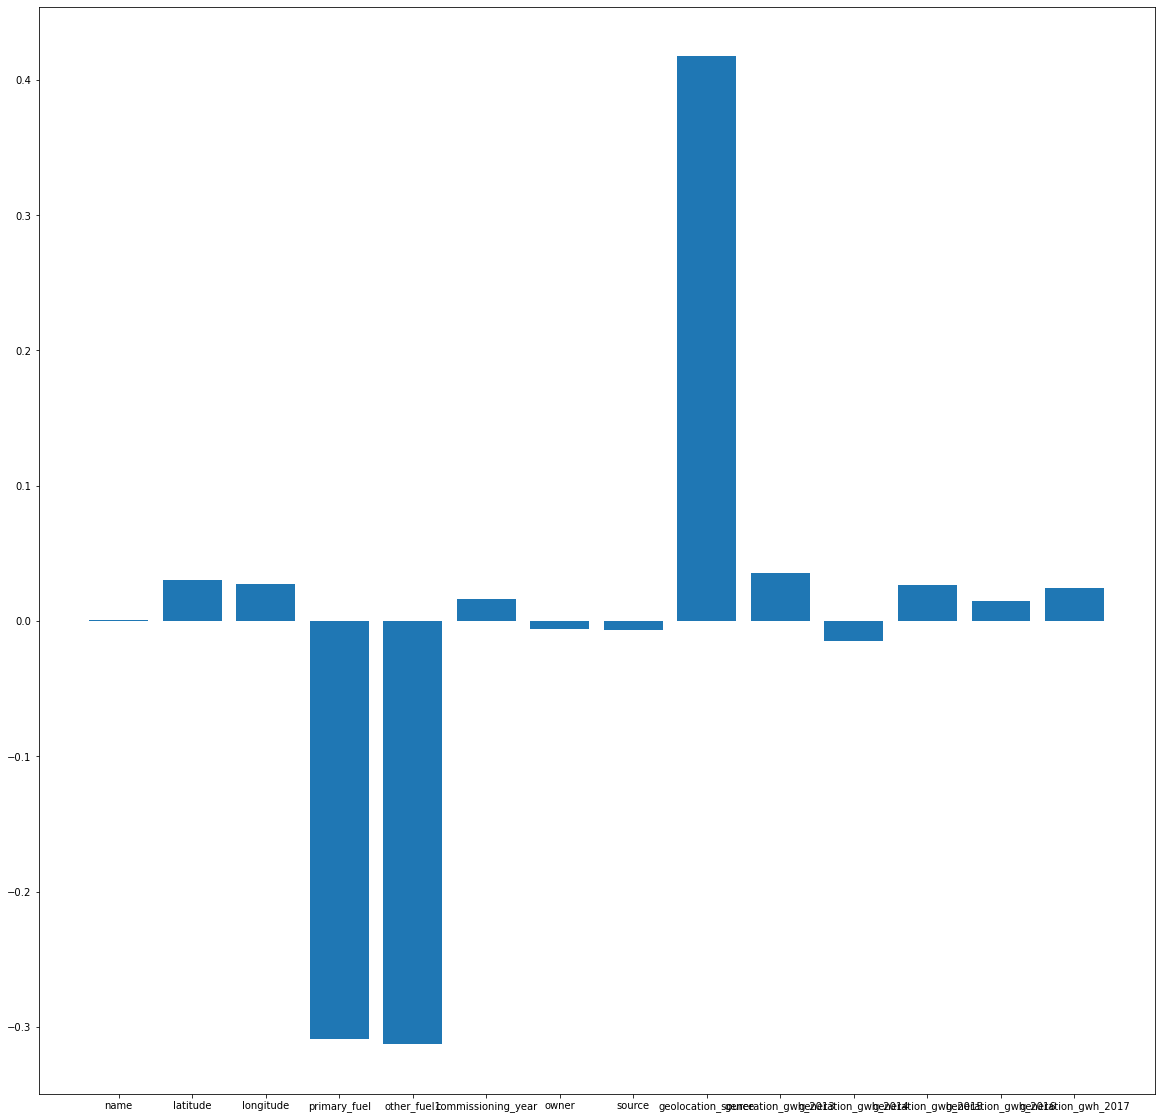

In [71]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
print(ls.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,ls.coef_)
plt.show()

In [72]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.4860067330322758


array([ 0.00071557,  0.0299493 ,  0.02767781, -0.30920246, -0.31737686,
        0.01639075, -0.00610723, -0.0068513 ,  0.41768874,  0.03588937,
       -0.01520713,  0.02655179,  0.01482495,  0.02410914])

0.4860068946705832
[ 0.00071535  0.0299605   0.02768659 -0.30915708 -0.32568457  0.01639357
 -0.00610741 -0.00684882  0.41798556  0.0360315  -0.01534185  0.02658362
  0.0149001   0.02404787]


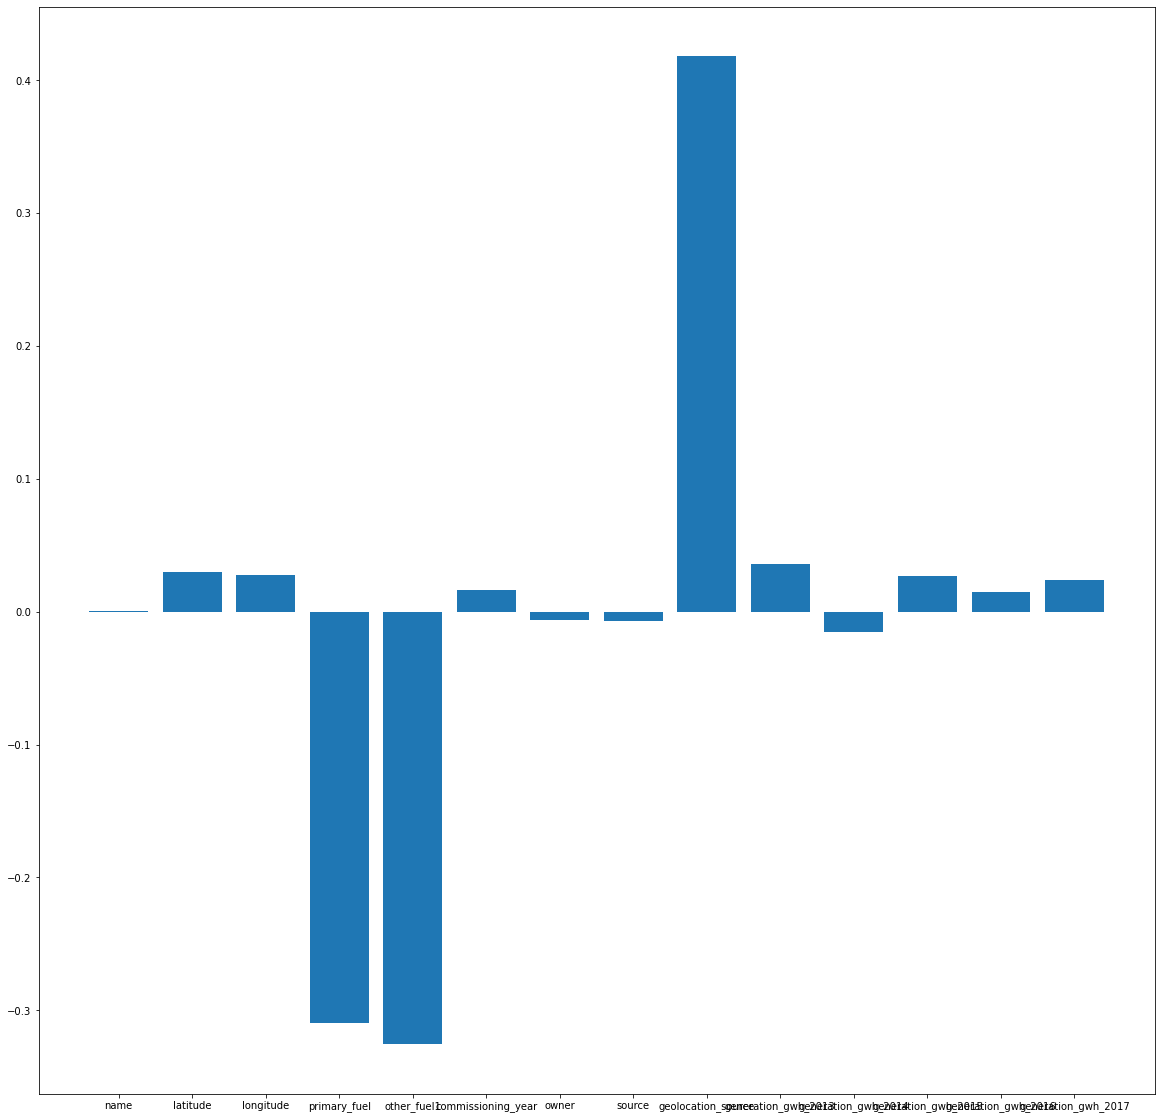

In [73]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
print(rd.score(x_train,y_train))
print(rd.coef_)
plt.figure(figsize=(20,20))
plt.bar(x.columns,rd.coef_)
plt.show() 

In [74]:
from sklearn.svm import SVR
svr=SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import SVR

In [76]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print("DTC SCORE:",dtc.score(x_train,y_train))

dtcpredict=dtc.predict(x_test)
print("dtc r2_score:",r2_score(y_test,dtcpredict))
print("mean squared error of DTC:",mean_squared_error(y_test,dtcpredict))
print("root mean squared error of DTC:",np.sqrt(mean_squared_error(y_test,dtcpredict)))

DTC SCORE: 1.0
dtc r2_score: 0.6898141376805615
mean squared error of DTC: 0.9892233548161926
root mean squared error of DTC: 0.9945970816447194


In [77]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print("KNR SCORE:",knr.score(x_train,y_train))

knrpredict=knr.predict(x_test)
print("knr r2_score:",r2_score(y_test,knrpredict))
print("mean squared error of KNN:",mean_squared_error(y_test,knrpredict))
print("root mean squared error of KNN:",np.sqrt(mean_squared_error(y_test,knrpredict)))

KNR SCORE: 0.5405073538940068
knr r2_score: 0.22084173757888848
mean squared error of KNN: 2.4848377824880186
root mean squared error of KNN: 1.5763368239332667


In [78]:
svr1=SVR()
svr1.fit(x_train,y_train)
print("SVR1 SCORE:",svr1.score(x_train,y_train))

svr1predict=svr1.predict(x_test)
print("SVR r2_score:",r2_score(y_test,svr1predict))
print("mean squared error of SVR:",mean_squared_error(y_test,svr1predict))
print("root mean squared error of SVR:",np.sqrt(mean_squared_error(y_test,svr1predict)))

SVR1 SCORE: 0.2049031997286357
SVR r2_score: 0.1752803842792935
mean squared error of SVR: 2.6301389075102044
root mean squared error of SVR: 1.6217703004772914


In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
predrf=rf.predict(x_test)
print(predrf)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predrf))

[2.07072946 1.31644379 4.60519199 6.00896583 1.80369635 1.9156558
 4.84598825 3.45255522 6.2016395  6.19587654 4.2808286  4.35227229
 4.62596938 3.39479595 3.3060406  2.58278182 2.46111768 5.15726061
 7.47256294 3.31231862 7.06666043 5.63357399 1.19586104 5.58369185
 3.19902413 2.15604375 4.16176934 2.74675299 8.16349774 3.98797561
 5.13277438 5.82983109 6.59296454 4.80776079 3.0030847  5.50066943
 3.36307218 6.04385217 3.08119286 3.23644903 3.56415938 3.62882393
 4.61669305 3.73971805 2.13999306 5.80915856 4.3014381  2.94963194
 4.3266771  4.46866954 2.95172693 7.99479221 3.10634176 4.91854253
 2.52151853 3.2161072  5.60505141 4.44322524 6.4805059  2.20267199
 3.36997268 5.14097699 2.95349506 6.06476188 1.57430505 3.22886297
 1.91795368 3.17762284 3.0631803  5.56524431 5.76843493 4.1825725
 4.87929692 2.25348417 4.24881062 6.33080929 5.81126305 7.2912303
 4.30511651 4.58841874 5.34641548 2.67467654 4.38741794 5.99532446
 5.91609264 5.41292606 5.17088226 3.91020608 2.95530733 1.9772084

In [80]:
from sklearn.ensemble import AdaBoostRegressor
#AdaBoostRegressor(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostRegressor(n_estimators=50,random_state=42)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(predad)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predad))

[3.19770002 2.53267272 4.90481053 5.41554912 3.16507186 2.84106011
 4.5796453  2.93215415 5.76965481 5.48110579 3.54323856 3.72956173
 4.5796453  4.79173934 2.9323647  2.93215415 2.72992824 5.12522364
 6.95197744 4.53380751 7.07544251 5.55654451 2.53267272 5.44802635
 3.46943085 2.72992824 4.5796453  2.56137092 7.17334526 3.00860838
 4.90481053 5.74976112 6.46340588 4.90481053 3.46943085 5.12522364
 3.73310114 5.75056129 3.47153614 3.54323856 3.73310114 3.73310114
 5.47159216 4.96919437 2.84106011 5.55654451 4.56577634 3.73310114
 4.91628174 3.62253381 3.38674984 7.22955844 3.00860838 5.36697025
 2.93215415 3.31339173 5.55654451 3.73310114 6.48031722 2.65804394
 3.46943085 5.24885897 3.51760101 5.74976112 2.65804394 3.47153614
 3.16507186 3.31339173 2.88499058 5.48780416 5.45883953 4.56175037
 4.90481053 3.20369744 3.85675573 6.62596299 5.56587019 6.95197744
 4.5796453  5.47127066 5.44802635 2.75399777 3.54323856 5.27172935
 5.47127066 5.75056129 5.27172935 3.54323856 3.51760101 2.5130

In [81]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(predgb)
print("rf score:",rf.score(x_train,y_train))
print("rf r2 score:",r2_score(y_test,predgb))

[2.37164255 1.41068765 4.58835201 5.58126093 2.53503789 2.49709274
 4.5978309  3.32931961 6.36045872 5.64694382 3.916683   4.2788962
 4.49010287 3.68832577 3.39919639 2.57802527 2.62879421 5.07474501
 7.30889052 3.82493442 7.02437268 6.15939664 1.51743044 5.55463327
 3.68524868 2.25200381 4.22248573 2.46641819 7.90513921 3.21768256
 4.72393188 5.31813639 6.83962542 4.32410425 3.33447388 5.47190093
 3.79937865 5.50294345 3.39672598 3.34491501 3.74419269 3.79942789
 4.75462792 3.64886171 2.4151018  5.82589536 4.71700175 3.47690145
 4.56362776 3.41230944 2.84103013 7.88025465 3.23889373 4.6548994
 2.8647794  2.88443896 5.55260227 3.86785748 6.53792407 2.12013183
 3.37102352 5.17401128 3.2533476  5.64964658 1.74414175 3.20670896
 2.92370125 2.97070429 2.91263508 5.19786104 5.33512166 3.93283672
 4.63321924 2.28853885 3.81754814 6.56152653 5.93148796 7.28016018
 4.44021346 4.66218395 5.46941768 2.68741797 3.9368804  5.56292217
 5.56392491 5.28363684 5.44445982 3.81518378 3.03659162 1.920752

We can see that the Decision Tree classifier is providing the best results. so we are opting the same for further prediction 

Text(0, 0.5, 'predict_y')

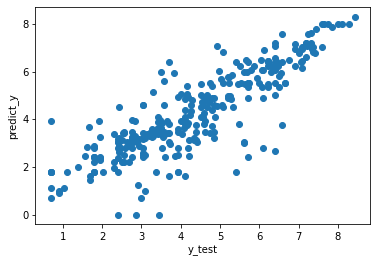

In [82]:
plt.scatter(x=y_test,y=dtcpredict)
plt.xlabel("y_test")
plt.ylabel("predict_y")

# Saving the model

In [83]:
import pickle
filename='Global1.pkl'
pickle.dump(dtc,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([2.19722458, 1.09861229, 4.79579055, 5.52545294, 1.60943791,
       0.91629073, 4.33073334, 3.25809654, 6.80350526, 6.04263283,
       3.83945231, 3.76120012, 4.94306997, 3.71357207, 3.21887582,
       2.86220088, 2.50143595, 4.79579055, 7.59135705, 3.25809654,
       6.95749737, 5.52545294, 0.69314718, 5.52545294, 2.44234704,
       2.77258872, 3.93182563, 1.79175947, 8.00001409, 4.53044664,
       5.86078622, 7.09090982, 6.2166061 , 4.7095302 , 1.60943791,
       4.90527478, 3.4339872 , 7.20860034, 2.86220088, 3.8501476 ,
       3.47815842, 3.47815842, 4.11087386, 3.4339872 , 0.99325177,
       4.51085951, 4.94875989, 3.04452244, 2.77258872, 2.37024374,
       2.73436751, 8.00001409, 3.48124009, 5.01727984, 2.50143595,
       3.16968558, 5.48479693, 4.60216568, 6.2166061 , 2.39789527,
       3.15700042, 4.97673374, 2.39789527, 6.39057618, 1.79175947,
       3.36729583, 2.19722458, 3.13549422, 3.58351894, 5.60211882,
       3.78418963, 4.16200321, 4.51085951, 3.06339092, 3.47815

# Lets now find out the prediction to find the primary_fuel by using different classification models

In [84]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,1.252763,28.1839,73.2407,6,2,2011.0,229,109,1,7.742862,7.792098,7.789485,7.805856,7.837063
1,1,4.595120,24.7663,74.6090,1,2,2013.0,258,174,2,7.742862,7.792098,7.789485,7.805856,7.837063
2,2,3.693867,21.9038,69.3732,7,2,2013.0,2,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
3,3,4.912655,23.8712,91.3602,2,2,2004.0,5,22,2,6.450120,6.427765,6.739037,6.787850,6.499448
4,4,7.496097,21.9603,82.4091,1,2,2015.0,5,22,2,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,7.378384,16.2949,77.3568,1,2,2016.0,5,22,2,7.742862,7.792098,0.690581,5.457868,6.764347
904,904,1.386294,12.8932,78.1654,6,2,2013.0,114,77,0,7.742862,7.792098,7.789485,7.805856,7.837063
905,905,3.277145,15.2758,75.5811,7,2,2013.0,5,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
906,906,4.394449,24.3500,73.7477,1,2,2013.0,91,59,2,7.742862,7.792098,7.789485,7.805856,7.837063


In [85]:
x=df
y=df.iloc[:,4]

In [86]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

In [87]:
x=df.drop("primary_fuel",axis=1)

In [88]:
x

,name,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,0,1.252763,28.1839,73.2407,2,2011.0,229,109,1,7.742862,7.792098,7.789485,7.805856,7.837063
1,1,4.595120,24.7663,74.6090,2,2013.0,258,174,2,7.742862,7.792098,7.789485,7.805856,7.837063
2,2,3.693867,21.9038,69.3732,2,2013.0,2,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
3,3,4.912655,23.8712,91.3602,2,2004.0,5,22,2,6.450120,6.427765,6.739037,6.787850,6.499448
4,4,7.496097,21.9603,82.4091,2,2015.0,5,22,2,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,903,7.378384,16.2949,77.3568,2,2016.0,5,22,2,7.742862,7.792098,0.690581,5.457868,6.764347
904,904,1.386294,12.8932,78.1654,2,2013.0,114,77,0,7.742862,7.792098,7.789485,7.805856,7.837063
905,905,3.277145,15.2758,75.5811,2,2013.0,5,21,2,7.742862,7.792098,7.789485,7.805856,7.837063
906,906,4.394449,24.3500,73.7477,2,2013.0,91,59,2,7.742862,7.792098,7.789485,7.805856,7.837063


In [89]:
x.shape,y.shape

((908, 14), (908,))

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [91]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((635, 14), (273, 14), (635,), (273,))

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [93]:
LG=LogisticRegression()

In [94]:
LG.fit(x_train,y_train)

LogisticRegression()

In [95]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.5128205128205128
[[ 0  3  0  0  0  0  7  0]
 [ 0 14  0 56  0  0 14  0]
 [ 0  1  0 18  0  0  5  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  4  0  0  2  0]
 [ 1  5  0  1  0  0 23  0]
 [ 0  1  0 12  0  0  0 22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.54      0.17      0.25        84
           2       0.00      0.00      0.00        24
           3       0.47      1.00      0.64        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.45      0.77      0.57        30
           7       1.00      0.63      0.77        35

    accuracy                           0.51       273
   macro avg       0.31      0.32      0.28       273
weighted avg       0.48      0.51      0.43       273



In [96]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.336996336996337
[[ 0  6  0  0  0  0  4  0]
 [ 0 80  0  0  0  0  4  0]
 [ 0 23  0  0  0  0  1  0]
 [ 0 81  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  1  0]
 [ 0 18  0  0  0  0 12  0]
 [ 0 35  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.32      0.95      0.48        84
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.55      0.40      0.46        30
           7       0.00      0.00      0.00        35

    accuracy                           0.34       273
   macro avg       0.11      0.17      0.12       273
weighted avg       0.16      0.34      0.20       273



In [97]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.42857142857142855
[[ 0  4  0  1  0  0  5  0]
 [ 0 39  0 35  0  0 10  0]
 [ 0  7  0 14  0  0  3  0]
 [ 0 26  0 55  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  4  0  2  0  0  2  0]
 [ 0  9  0  3  0  0 18  0]
 [ 0 20  0 10  0  0  0  5]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.36      0.46      0.40        84
           2       0.00      0.00      0.00        24
           3       0.45      0.68      0.54        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.47      0.60      0.53        30
           7       1.00      0.14      0.25        35

    accuracy                           0.43       273
   macro avg       0.29      0.24      0.22       273
weighted avg       0.43      0.43      0.38       273



In [98]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7948717948717948
[[ 9  1  0  0  0  0  0  0]
 [ 4 68  4  6  1  1  0  0]
 [ 1  8  6  6  1  2  0  0]
 [ 0  4  7 69  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  5  2  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.82      0.81      0.81        84
           2       0.27      0.25      0.26        24
           3       0.83      0.85      0.84        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.79       273
   macro avg       0.57      0.60      0.58       273
weighted avg       0.78      0.79      0.79       273



In [99]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.5494505494505495
[[ 3  3  0  0  0  0  4  0]
 [12 51  1 11  0  0  6  3]
 [ 1  8  2  7  0  0  3  3]
 [ 0 20  3 58  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  3  0  2  0  0  3  0]
 [14  2  1  0  0  0 12  1]
 [ 0 10  0  1  0  0  0 24]]
              precision    recall  f1-score   support

           0       0.10      0.30      0.15        10
           1       0.53      0.61      0.56        84
           2       0.29      0.08      0.13        24
           3       0.72      0.72      0.72        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       0.43      0.40      0.41        30
           7       0.77      0.69      0.73        35

    accuracy                           0.55       273
   macro avg       0.35      0.35      0.34       273
weighted avg       0.55      0.55      0.54       273



In [100]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8498168498168498
[[ 9  1  0  0  0  0  0  0]
 [ 1 74  3  5  0  1  0  0]
 [ 2  5  9  8  0  0  0  0]
 [ 0  7  0 74  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  3  3  1  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.81      0.88      0.85        84
           2       0.60      0.38      0.46        24
           3       0.84      0.91      0.88        81
           4       0.00      0.00      0.00         1
           5       0.50      0.12      0.20         8
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       273
   macro avg       0.69      0.65      0.65       273
weighted avg       0.83      0.85      0.83       273



In [101]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.45787545787545786
[[10  0  0  0  0  0  0  0]
 [25  5  0 54  0  0  0  0]
 [ 6  0  0 18  0  0  0  0]
 [ 0  0  0 81  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 3  1  0  4  0  0  0  0]
 [ 1  0  0  0  0  0 29  0]
 [23 12  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        10
           1       0.28      0.06      0.10        84
           2       0.00      0.00      0.00        24
           3       0.51      1.00      0.68        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      0.97      0.98        30
           7       0.00      0.00      0.00        35

    accuracy                           0.46       273
   macro avg       0.24      0.38      0.25       273
weighted avg       0.35      0.46      0.35       273



In [102]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8534798534798534
[[ 9  1  0  0  0  0  0  0]
 [ 1 75  1  6  0  1  0  0]
 [ 2  4  8 10  0  0  0  0]
 [ 0  3  0 76  1  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  3  4  1  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.87      0.89      0.88        84
           2       0.62      0.33      0.43        24
           3       0.81      0.94      0.87        81
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         8
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.85       273
   macro avg       0.63      0.63      0.63       273
weighted avg       0.83      0.85      0.84       273



In [103]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.34615385 0.25274725 0.31868132 0.48066298 0.30939227]
0.34152753324024043
0.0759165850732706


In [104]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80769231 0.78571429 0.82967033 0.82872928 0.80110497]
0.8105822354441139
0.016794378541122507


In [105]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83516484 0.82967033 0.87362637 0.83425414 0.84530387]
0.8436039099022524
0.015855717915715106


In [106]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.83516484 0.85164835 0.86263736 0.81767956 0.84530387]
0.8424867949729828
0.015276946658989881


In [107]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.42857143 0.41208791 0.54395604 0.4198895  0.51381215]
0.46366340841478965
0.054349678494915545


In [108]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.46703297 0.48901099 0.47802198 0.51381215 0.42541436]
0.4746584906805902
0.029097935396095332


In [109]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.46153846 0.40659341 0.35714286 0.37569061 0.32044199]
0.38428146439196165
0.04764924305608516


We can see that the Gradient Boosting Classifier is providing the best result 85% with the r2 score 84%. so we will be opting the same for prediction. 

# Creating AUC-ROC Curve

In [110]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [111]:
y_pred_prob=gb.predict_proba(x_test)[:,1]

In [112]:
y_pred_prob

array([2.64505033e-02, 1.94385316e-05, 1.21540157e-03, 1.43655273e-02,
       8.05921248e-03, 3.64988214e-05, 7.45033619e-04, 1.15388940e-04,
       6.15260236e-01, 8.79737648e-01, 9.00850823e-01, 9.58383467e-01,
       4.75361386e-04, 9.95109658e-01, 8.78362470e-05, 7.46100882e-05,
       7.17360137e-05, 1.12579577e-03, 5.15250078e-01, 8.92029329e-01,
       9.75161825e-01, 5.36095547e-02, 3.56802959e-05, 3.53847578e-04,
       9.53636174e-01, 3.88790358e-05, 7.92407403e-04, 2.73723094e-05,
       9.98069642e-01, 7.16633818e-05, 2.69488789e-02, 1.74117791e-01,
       3.83670829e-01, 5.09092116e-04, 9.31382514e-01, 5.31749435e-02,
       8.43778714e-01, 9.71587518e-01, 6.31896268e-03, 9.96225921e-01,
       9.46212278e-01, 8.50050293e-01, 9.52607617e-01, 7.77177466e-02,
       3.64988908e-05, 4.68447698e-02, 3.94976845e-03, 9.86180180e-01,
       1.68103857e-01, 3.85396566e-05, 3.64989258e-05, 9.96247769e-01,
       3.22386661e-05, 8.55298995e-01, 3.40946019e-05, 3.00244857e-02,
      

In [113]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob,pos_label=True)

In [114]:
print(fpr)

[0.         0.         0.         0.00529101 0.00529101 0.00529101
 0.00529101 0.01058201 0.01058201 0.01587302 0.01587302 0.02116402
 0.02116402 0.02645503 0.02645503 0.03174603 0.03174603 0.03703704
 0.03703704 0.04232804 0.04232804 0.05291005 0.05291005 0.05820106
 0.05820106 0.07936508 0.07936508 0.08465608 0.08465608 0.1957672
 0.1957672  0.23280423 0.23280423 0.3015873  0.3015873  0.48148148
 0.48148148 0.52910053 0.52910053 0.85185185 0.86772487 1.        ]


In [115]:
fpr

array([0.        , 0.        , 0.        , 0.00529101, 0.00529101,
       0.00529101, 0.00529101, 0.01058201, 0.01058201, 0.01587302,
       0.01587302, 0.02116402, 0.02116402, 0.02645503, 0.02645503,
       0.03174603, 0.03174603, 0.03703704, 0.03703704, 0.04232804,
       0.04232804, 0.05291005, 0.05291005, 0.05820106, 0.05820106,
       0.07936508, 0.07936508, 0.08465608, 0.08465608, 0.1957672 ,
       0.1957672 , 0.23280423, 0.23280423, 0.3015873 , 0.3015873 ,
       0.48148148, 0.48148148, 0.52910053, 0.52910053, 0.85185185,
       0.86772487, 1.        ])

In [116]:
tpr

array([0.        , 0.01190476, 0.27380952, 0.27380952, 0.36904762,
       0.39285714, 0.5       , 0.5       , 0.55952381, 0.55952381,
       0.63095238, 0.63095238, 0.70238095, 0.70238095, 0.72619048,
       0.72619048, 0.79761905, 0.79761905, 0.82142857, 0.82142857,
       0.83333333, 0.83333333, 0.86904762, 0.86904762, 0.89285714,
       0.89285714, 0.91666667, 0.91666667, 0.94047619, 0.94047619,
       0.95238095, 0.95238095, 0.96428571, 0.96428571, 0.97619048,
       0.97619048, 0.98809524, 0.98809524, 1.        , 1.        ,
       1.        , 1.        ])

In [117]:
thresholds

array([1.99806964e+00, 9.98069642e-01, 9.92054674e-01, 9.91369315e-01,
       9.85911605e-01, 9.84528073e-01, 9.67812629e-01, 9.64690956e-01,
       9.52607617e-01, 9.46212278e-01, 9.28366903e-01, 9.26388808e-01,
       8.92029329e-01, 8.79737648e-01, 8.59341129e-01, 8.55298995e-01,
       7.85107154e-01, 7.68199314e-01, 7.12094282e-01, 7.05812789e-01,
       7.04286057e-01, 6.77359854e-01, 6.15260236e-01, 6.14569428e-01,
       5.09571939e-01, 3.05240196e-01, 2.73985589e-01, 2.73027364e-01,
       2.55254668e-01, 7.27599832e-02, 6.87556074e-02, 4.68447698e-02,
       3.94192774e-02, 2.13572016e-02, 2.11848132e-02, 5.06206765e-03,
       4.75387010e-03, 2.17146224e-03, 2.04490352e-03, 3.85396566e-05,
       3.64989258e-05, 1.80026252e-05])

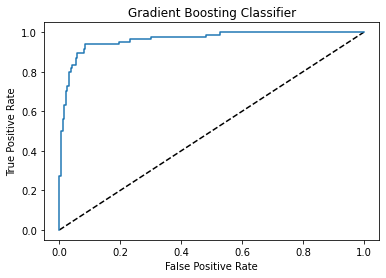

In [118]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting Classifier")
plt.show()

# Saving the Model

In [119]:
import pickle
filename='Global2.pkl'
pickle.dump(gb,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([3, 6, 3, 3, 3, 7, 3, 7, 1, 1, 1, 1, 3, 1, 7, 7, 7, 3, 1, 1, 1, 3,
       6, 3, 1, 6, 3, 6, 1, 7, 2, 3, 2, 3, 1, 3, 1, 1, 0, 1, 1, 1, 1, 3,
       7, 3, 3, 1, 2, 7, 7, 1, 7, 1, 7, 0, 3, 1, 1, 6, 0, 3, 1, 1, 6, 0,
       3, 0, 7, 5, 3, 5, 3, 3, 1, 1, 2, 1, 3, 3, 3, 6, 1, 3, 3, 3, 3, 1,
       1, 6, 3, 3, 2, 6, 3, 3, 7, 1, 3, 3, 1, 3, 1, 3, 3, 7, 0, 3, 1, 3,
       3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 7, 6, 1, 6, 1, 1, 2, 1, 0, 7, 3, 1,
       7, 7, 2, 3, 3, 3, 0, 3, 6, 1, 1, 1, 6, 6, 3, 4, 2, 6, 1, 6, 7, 3,
       6, 3, 2, 3, 3, 1, 7, 3, 3, 1, 1, 1, 3, 3, 1, 3, 1, 7, 1, 3, 1, 1,
       7, 1, 1, 3, 1, 6, 3, 1, 6, 6, 2, 1, 1, 6, 3, 3, 7, 3, 7, 1, 3, 1,
       6, 3, 1, 3, 1, 1, 2, 3, 7, 3, 3, 1, 2, 7, 0, 7, 3, 1, 1, 1, 7, 1,
       7, 3, 3, 3, 3, 3, 6, 0, 1, 3, 6, 3, 3, 3, 1, 3, 1, 7, 7, 7, 3, 3,
       1, 3, 1, 1, 3, 2, 3, 7, 1, 3, 3, 6, 0, 1, 1, 1, 6, 7, 3, 1, 6, 6,
       7, 1, 3, 6, 1, 6, 0, 3, 1])